In [ ]:
!pip install Tashaphyne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install clean_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install clean-text[gpl]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyarabic.arabrepr
arepr = pyarabic.arabrepr.ArabicRepr()
repr = arepr.repr
from tashaphyne.stemming import ArabicLightStemmer
ArListem = ArabicLightStemmer()
word = ''
stem = ArListem.light_stem(word)
print (ArListem.get_stem())
print (ArListem.get_root())
print (ArListem.get_unvocalized())

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from collections import Counter
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from cleantext import clean
import emoji

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data = pd.read_excel('/content/reviews.xlsx')

In [ ]:
data.head()

Text  Class
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...      1
1  المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...      1
2  سناكاته زاكية سعره سعر السوق ..احلى ما في المو...      1
3  بهارات البروستد كتير مميزة ومش ناقصها اشي , وا...      1
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...      0

In [ ]:
data.isnull().sum()

Text     0
Class    0
dtype: int64

In [ ]:
data.shape

(2500, 2)

In [ ]:
data.duplicated().sum()

19

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2481 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2481 non-null   object
 1   Class   2481 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.1+ KB


In [ ]:
data.shape

(2481, 2)

In [ ]:
import unicodedata as ud
def clean_text(text): 
    print(text)
    text2 = ''.join(c for c in text if not ud.category(c).startswith('P'))
    print(text2)
    return text2

In [ ]:
def clean_emoji(text):
  print(text) # with emoji

  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  
  new_text = emoji_pattern.sub('', text)
  print(new_text) # no emoji
  return new_text

In [ ]:
data['no_emoji'] = data['Text'].apply(clean_emoji)

المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الرمضاني. المكان نظيف جدا و مرتب والخدمه ممتازه .. نظام البوفيه حلو .. بتم توزيع المقبلات على الطاولات حسب العدد الموجود .. وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب .. العصائر ما فيها تشكيل يعني تمر هندي او جلاب ... بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي ..والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته ..يعني ممكن تختار اليوم اللي بعجبك .. الحلو نوع واحد ... والفواكه بطيخ و شمام .. اﻷكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى .. سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير .. يعني بشكل عام لازم الواحد يروح يجربه .. 
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني. المكان نظيف جدا و مرتب والخدمه ممتازه .. نظام البوفيه حلو .. بتم توزيع المقبلات على الطاولات حسب العدد ال

In [ ]:
data['no_emoji'] = data['no_emoji'].apply(clean_text)

المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني. المكان نظيف جدا و مرتب والخدمه ممتازه .. نظام البوفيه حلو .. بتم توزيع المقبلات على الطاولات حسب العدد الموجود .. وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب .. العصائر ما فيها تشكيل يعني تمر هندي او جلاب ... بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي ..والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته ..يعني ممكن تختار اليوم اللي بعجبك .. الحلو نوع واحد ... والفواكه بطيخ و شمام .. اكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى .. سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير .. يعني بشكل عام لازم الواحد يروح يجربه .. 
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  

In [ ]:
def clean_numbers(text):
  print(text)
  result = ''.join([i for i in text if not i.isdigit()])
  print(result)
  return result

In [ ]:
data.head(20)

Text  Class  \
0   المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...      1   
1   المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...      1   
2   سناكاته زاكية سعره سعر السوق ..احلى ما في المو...      1   
3   بهارات البروستد كتير مميزة ومش ناقصها اشي , وا...      1   
4   هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...      0   
5       الخدمة ممتازة .. بس الاكل بارد ومو زاكي ابدا       0   
6   بدك توكل بيتزا زاكية وتحس انك بتوكل اشي من الب...      1   
7             مرههههههههههههههههه روعه واكله كلش طيب       1   
8   صراحه احنا منشتري منع مرتين فالاسبوع من هاد ال...      1   
9   اعتقد انه افضل مطعم فول وفلافل في عمان خصوصا ا...      1   
10              الدجاج لذيذ والمطعم بشكل عام جيد جدا       1   
11  يا سلام هو في بعد البيتزا وخصوصا مارغاريتا مع ...      1   
12  أطييب ساندويش فلافل و أطييب حمص بأكلو عندو. سع...      1   
13  الاكل زاكي الخدمه كويسه المحل نظيف و الاسعار م...      1   
14  بصراحة اطيب بيتزا في عمان جد يعطيكم العافية اش...      1   
15  أزكى شاورما لحمة فيكي يا عمان و جربوا عصير الا...      1   
16  عندهم تشكيلة برجر متنوعة وجديدة وبأحجام مختلفة...      1   
17  اكل طيب ومعاملة طيبة ما اكلت معجنات افضل من هذ...      1   
18                                         الطعم عادي      0   
19  بحب اسم المكان بيحس واحد يكدر بيرجع البلده بيو...      1   

                                             no_emoji  
0   المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...  
1   المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...  
2   سناكاته زاكية سعره سعر السوق احلى ما في الموضو...  
3   بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...  
4   هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...  
5         الخدمة ممتازة  بس الاكل بارد ومو زاكي ابدا   
6   بدك توكل بيتزا زاكية وتحس انك بتوكل اشي من الب...  
7             مرههههههههههههههههه روعه واكله كلش طيب   
8   صراحه احنا منشتري منع مرتين فالاسبوع من هاد ال...  
9   اعتقد انه افضل مطعم فول وفلافل في عمان خصوصا ا...  
10              الدجاج لذيذ والمطعم بشكل عام جيد جدا   
11  يا سلام هو في بعد البيتزا وخصوصا مارغاريتا مع ...  
12  أطييب ساندويش فلافل و أطييب حمص بأكلو عندو سعر...  
13  الاكل زاكي الخدمه كويسه المحل نظيف و الاسعار م...  
14  بصراحة اطيب بيتزا في عمان جد يعطيكم العافية اش...  
15  أزكى شاورما لحمة فيكي يا عمان و جربوا عصير الا...  
16  عندهم تشكيلة برجر متنوعة وجديدة وبأحجام مختلفة...  
17  اكل طيب ومعاملة طيبة ما اكلت معجنات افضل من هذ...  
18                                         الطعم عادي  
19  بحب اسم المكان بيحس واحد يكدر بيرجع البلده بيو...

In [ ]:
data['no_num'] = data['no_emoji'].apply(clean_numbers)

المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب  العصائر ما فيها تشكيل يعني تمر هندي او جلاب  بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا 8 انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته يعني ممكن تختار اليوم اللي بعجبك  الحلو نوع واحد  والفواكه بطيخ و شمام  اكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى  سعر البوفيه 17 دينار للكبار و الصغار 8 دنانير  يعني بشكل عام لازم الواحد يروح يجربه  
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله

In [ ]:
def no_en(text):
  print(text)
  output = re.sub(r'\s*[A-Za-z]+\b', '' , text)
  output = output.rstrip()
  print(output)
  return output

In [ ]:
data['no_eng'] = data['no_num'].apply(no_en)

المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه 
المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والصحن اللي بفضى بتم تبديله مباشره اذا بتحب  العصائر ما فيها تشكيل يعني تمر هندي او جلاب  بالنسبه للوجبات الرئيسيه الموجوده تشكيلتها جيده وتقريبا  انواع بين الكفته و الكبه اللبنيه والمعكرونه والرز و المندي والحلو انه كل يوم عندهم جدول بالبوفيه الموجود ومكوناته يعني ممكن تختار اليوم اللي بعجبك  الحلو نوع واحد  والفواكه بطيخ و شمام  اكل بشكل عام طعمه طيب وزاكي والمطعم مرتب ما في ازمه عالبوفيه ولا فيه فوضى  سعر البوفيه  دينار للكبار و الصغار  دنانير  يعني بشكل عام لازم الواحد يروح يجربه  
المطعم زرته ول مرة مبارح على بوفيه الفطور الرمضاني المكان نظيف جدا و مرتب والخدمه ممتازه  نظام البوفيه حلو  بتم توزيع المقبلات على الطاولات حسب العدد الموجود  وبتشكيله متنوعه وكميات معقوله والص

In [ ]:
data['tokenize'] = data['no_eng'].apply(word_tokenize)

In [ ]:
#Remove stop words
stop_words = set(stopwords.words('arabic'))
data['stop_words_removed'] = data['tokenize'].apply(lambda x: " ".join(i for i in x if i not in stop_words))

data.head()

Text  Class  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...      1   
1  المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...      1   
2  سناكاته زاكية سعره سعر السوق ..احلى ما في المو...      1   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي , وا...      1   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...      0   

                                            no_emoji  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...   
2  سناكاته زاكية سعره سعر السوق احلى ما في الموضو...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                              no_num  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...   
2  سناكاته زاكية سعره سعر السوق احلى ما في الموضو...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                              no_eng  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...   
2  سناكاته زاكية سعره سعر السوق احلى ما في الموضو...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                            tokenize  \
0  [المكان, كتيير, حلو, اكله, الحمدلله, منيح, عاد...   
1  [المطعم, زرته, ول, مرة, مبارح, على, بوفيه, الف...   
2  [سناكاته, زاكية, سعره, سعر, السوق, احلى, ما, ف...   
3  [بهارات, البروستد, كتير, مميزة, ومش, ناقصها, ا...   
4  [هاد, الفرع, مش, تابع, لشاورما, الريم, الاصلي,...   

                                  stop_words_removed  
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...  
1  المطعم زرته ول مرة مبارح بوفيه الفطور الرمضاني...  
2  سناكاته زاكية سعره سعر السوق احلى الموضوع انه ...  
3  بهارات البروستد كتير مميزة ومش ناقصها اشي والا...  
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...

In [ ]:
data.shape

(2481, 7)

In [ ]:
arepr = pyarabic.arabrepr.ArabicRepr()
repr = arepr.repr
ArListem = ArabicLightStemmer()
data['stemming'] = data['stop_words_removed'].apply(lambda x: " ".join([ArListem.light_stem(word) for word in x.split()]))

In [ ]:
data.head()

Text  Class  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...      1   
1  المطعم زرته ﻷول مرة مبارح على بوفيه الفطور الر...      1   
2  سناكاته زاكية سعره سعر السوق ..احلى ما في المو...      1   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي , وا...      1   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...      0   

                                            no_emoji  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...   
2  سناكاته زاكية سعره سعر السوق احلى ما في الموضو...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                              no_num  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...   
2  سناكاته زاكية سعره سعر السوق احلى ما في الموضو...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                              no_eng  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح على بوفيه الفطور الرم...   
2  سناكاته زاكية سعره سعر السوق احلى ما في الموضو...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي  وال...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                            tokenize  \
0  [المكان, كتيير, حلو, اكله, الحمدلله, منيح, عاد...   
1  [المطعم, زرته, ول, مرة, مبارح, على, بوفيه, الف...   
2  [سناكاته, زاكية, سعره, سعر, السوق, احلى, ما, ف...   
3  [بهارات, البروستد, كتير, مميزة, ومش, ناقصها, ا...   
4  [هاد, الفرع, مش, تابع, لشاورما, الريم, الاصلي,...   

                                  stop_words_removed  \
0  المكان كتيير حلو اكله الحمدلله منيح عادي وفي ا...   
1  المطعم زرته ول مرة مبارح بوفيه الفطور الرمضاني...   
2  سناكاته زاكية سعره سعر السوق احلى الموضوع انه ...   
3  بهارات البروستد كتير مميزة ومش ناقصها اشي والا...   
4  هاد الفرع مش تابع لشاورما الريم الاصلي فروع شا...   

                                            stemming  
0        مك تيير حل كل حمدلله منيح عاد في شي انت طيب  
1  مطعم زر ول مرة مبارح وف فطور رمضان مك ظيف جد م...  
2         سناك زاك سعر سعر سوق حلى موضوع نه خدم وصيل  
3  هار بروستد تير مميز مش ناقص شي اكل مستو منيح ه...  
4  هاد فرع مش تابع شاورم ريم اصل روع شاورم ريم مع...

In [ ]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(data['stemming'])

tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as met
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [ ]:
data['Class'].value_counts()

1    1884
2     347
0     250
Name: Class, dtype: int64

In [ ]:
avgList = []
preList = []
recList = []
f1List = []
for x in range(10):
  clf = MultinomialNB().fit(train_x, train_y)
  y_score = clf.predict(test_x)
  print('accuracy =', met.accuracy_score(test_y,y_score))
  print('precision =',met.precision_score(test_y,y_score,average='micro'))
  print('recall =',met.recall_score(test_y,y_score,average='micro'))
  print('f1 =',met.f1_score(test_y,y_score,average='micro'))
  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')
  avgList.append(met.accuracy_score(test_y,y_score))
  preList.append(met.precision_score(test_y,y_score,average='micro'))
  recList.append(met.recall_score(test_y,y_score,average='micro'))
  f1List.append(met.f1_score(test_y,y_score,average='micro'))

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

accuracy = 0.7436241610738255
precision = 0.7436241610738255
recall = 0.7436241610738255
f1 = 0.7436241610738253
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.7436241610738255
precision = 0.7436241610738255
recall = 0.7436241610738255
f1 = 0.7436241610738253
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.7436241610738255
precision = 0.7436241610738255
recall = 0.7436241610738255
f1 = 0.7436241610738253
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.7436241610738255
precision = 0.7436241610738255
recall = 0.7436241610738255
f1 = 0.7436241610738253
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.7436241610738255
precision = 0.7436241610738255
recall = 0.74362416

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(x_train_tfidf, y)
print(sorted(Counter(y_resampled).items()))

[(0, 1884), (1, 1884), (2, 1884)]


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [ ]:
avgList = []
preList = []
recList = []
f1List = []
for x in range(10):
  clf = MultinomialNB().fit(train_x, train_y)
  y_score = clf.predict(test_x)
  print('accuracy =', met.accuracy_score(test_y,y_score))
  print('precision =',met.precision_score(test_y,y_score,average='micro'))
  print('recall =',met.recall_score(test_y,y_score,average='micro'))
  print('f1 =',met.f1_score(test_y,y_score,average='micro'))
  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')
  avgList.append(met.accuracy_score(test_y,y_score))
  preList.append(met.precision_score(test_y,y_score,average='micro'))
  recList.append(met.recall_score(test_y,y_score,average='micro'))
  f1List.append(met.f1_score(test_y,y_score,average='micro'))

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)
models = {'naive_bayes':{'accuracy':average_acc ,'presicion': average_pre, 'recaill':average_rec, 'f1':average_f1}}
data2 = pd.DataFrame(data=models)
data2.head()

accuracy = 0.9375
precision = 0.9375
recall = 0.9375
f1 = 0.9375
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9375
precision = 0.9375
recall = 0.9375
f1 = 0.9375
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9375
precision = 0.9375
recall = 0.9375
f1 = 0.9375
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9375
precision = 0.9375
recall = 0.9375
f1 = 0.9375
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9375
precision = 0.9375
recall = 0.9375
f1 = 0.9375
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9375
precision = 0.9375
recall = 0.9375
f1 = 0.9375
-------------------------

naive_bayes
accuracy        0.9375
f1              0.9375
presicion       0.9375
recaill         0.9375

In [ ]:
from sklearn.ensemble import RandomForestClassifier
avgList = []
preList = []
recList = []
f1List = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=50,max_depth=38)
  clf2.fit(train_x, train_y)
  y_score = clf2.predict(test_x)
  print('accuracy =', met.accuracy_score(test_y,y_score))
  print('precision =',met.precision_score(test_y,y_score,average='micro'))
  print('recall =',met.recall_score(test_y,y_score,average='micro'))
  print('f1 =',met.f1_score(test_y,y_score,average='micro'))
  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')
  avgList.append(met.accuracy_score(test_y,y_score))
  preList.append(met.precision_score(test_y,y_score,average='micro'))
  recList.append(met.recall_score(test_y,y_score,average='micro'))
  f1List.append(met.f1_score(test_y,y_score,average='micro'))

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)

models2 = [average_acc , average_pre, average_rec, average_f1]
data2['random_forests'] = models2

accuracy = 0.9469339622641509
precision = 0.9469339622641509
recall = 0.9469339622641509
f1 = 0.9469339622641509
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9540094339622641
precision = 0.9540094339622641
recall = 0.9540094339622641
f1 = 0.9540094339622641
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9551886792452831
precision = 0.9551886792452831
recall = 0.9551886792452831
f1 = 0.955188679245283
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9545990566037735
precision = 0.9545990566037735
recall = 0.9545990566037735
f1 = 0.9545990566037735
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9463443396226415
precision = 0.9463443396226415
recall = 0.946344339

In [ ]:
data2

naive_bayes  random_forests
accuracy        0.9375        0.951297
f1              0.9375        0.951297
presicion       0.9375        0.951297
recaill         0.9375        0.951297

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
avgList = []
preList = []
recList = []
f1List = []
for x in range(10):
  neigh = KNeighborsClassifier(n_neighbors=1)
  neigh.fit(train_x, train_y)
  y_score = neigh.predict(test_x)
  print('accuracy =', met.accuracy_score(test_y,y_score))
  print('precision =',met.precision_score(test_y,y_score,average='micro'))
  print('recall =',met.recall_score(test_y,y_score,average='micro'))
  print('f1 =',met.f1_score(test_y,y_score,average='micro'))
  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')
  avgList.append(met.accuracy_score(test_y,y_score))
  preList.append(met.precision_score(test_y,y_score,average='micro'))
  recList.append(met.recall_score(test_y,y_score,average='micro'))
  f1List.append(met.f1_score(test_y,y_score,average='micro'))

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)

models3 = [average_acc , average_pre, average_rec, average_f1]
data2['knn'] = models3

accuracy = 0.691627358490566
precision = 0.691627358490566
recall = 0.691627358490566
f1 = 0.691627358490566
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.691627358490566
precision = 0.691627358490566
recall = 0.691627358490566
f1 = 0.691627358490566
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.691627358490566
precision = 0.691627358490566
recall = 0.691627358490566
f1 = 0.691627358490566
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.691627358490566
precision = 0.691627358490566
recall = 0.691627358490566
f1 = 0.691627358490566
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.691627358490566
precision = 0.691627358490566
recall = 0.691627358490566
f1 = 0.691

In [ ]:
data2

naive_bayes  random_forests       knn
accuracy        0.9375        0.951297  0.691627
f1              0.9375        0.951297  0.691627
presicion       0.9375        0.951297  0.691627
recaill         0.9375        0.951297  0.691627

In [ ]:
from sklearn.linear_model import LogisticRegression
avgList = []
preList = []
recList = []
f1List = []
for x in range(10):
  clf12 = LogisticRegression(multi_class='multinomial')
  clf12.fit(train_x, train_y)
  y_score = clf12.predict(test_x)
  print('accuracy =', met.accuracy_score(test_y,y_score))
  print('precision =',met.precision_score(test_y,y_score,average='micro'))
  print('recall =',met.recall_score(test_y,y_score,average='micro'))
  print('f1 =',met.f1_score(test_y,y_score,average='micro'))
  print('--------------------------------------')
  print('--------------------------------------') 
  print('--------------------------------------')
  avgList.append(met.accuracy_score(test_y,y_score))
  preList.append(met.precision_score(test_y,y_score,average='micro'))
  recList.append(met.recall_score(test_y,y_score,average='micro'))
  f1List.append(met.f1_score(test_y,y_score,average='micro'))

print("average acc=" ,sum(avgList)/len(avgList))
print("average pre=" ,sum(preList)/len(preList))
print("average rec=" ,sum(recList)/len(recList))
print("average f1=" ,sum(f1List)/len(f1List))

average_acc= sum(avgList)/len(avgList)
average_pre=sum(preList)/len(preList)
average_rec=sum(recList)/len(recList)
average_f1=sum(f1List)/len(f1List)

models4 = [average_acc , average_pre, average_rec, average_f1]
data2['logistic_regression'] = models4

accuracy = 0.9581367924528302
precision = 0.9581367924528302
recall = 0.9581367924528302
f1 = 0.9581367924528303
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9581367924528302
precision = 0.9581367924528302
recall = 0.9581367924528302
f1 = 0.9581367924528303
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9581367924528302
precision = 0.9581367924528302
recall = 0.9581367924528302
f1 = 0.9581367924528303
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9581367924528302
precision = 0.9581367924528302
recall = 0.9581367924528302
f1 = 0.9581367924528303
--------------------------------------
--------------------------------------
--------------------------------------
accuracy = 0.9581367924528302
precision = 0.9581367924528302
recall = 0.95813679

In [ ]:
data2

naive_bayes  random_forests       knn  logistic_regression
accuracy        0.9375        0.951297  0.691627             0.958137
f1              0.9375        0.951297  0.691627             0.958137
presicion       0.9375        0.951297  0.691627             0.958137
recaill         0.9375        0.951297  0.691627             0.958137

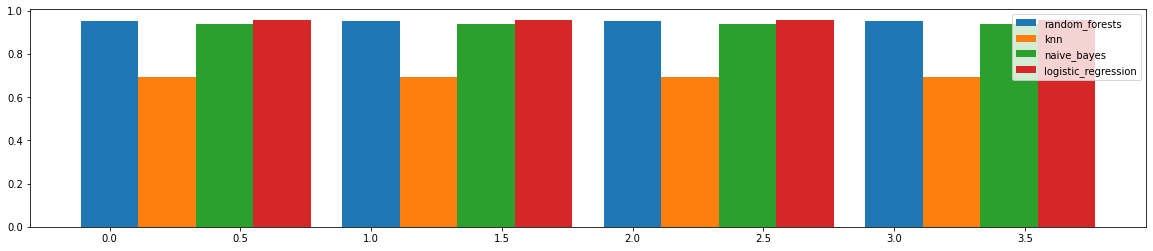

In [ ]:
import matplotlib.pyplot as plt
width = 0.22
plt.figure(figsize=(20,4))
plt.bar(np.arange(len(data2['random_forests'])), data2['random_forests'], width=width )
plt.bar(np.arange(len(data2['knn']))+ width , data2['knn'], width=width )
plt.bar(np.arange(len(data2['naive_bayes'])) + width*2, data2['naive_bayes'], width=width )
plt.bar(np.arange(len(data2['logistic_regression']))+ width*3, data2['logistic_regression'], width=width )
plt.legend(['random_forests','knn','naive_bayes','logistic_regression'])
plt.show()

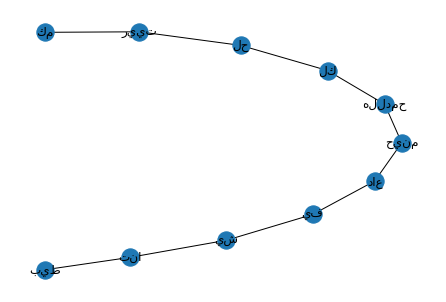

In [ ]:
import networkx as nx
import re
# Create an empty graph
G = nx.Graph()

# Define the sentence
sentence = 'مك تيير حل كل حمدلله منيح عاد في شي انت طيب'
sentence = sentence[::-1]

words = sentence.split()
# Add nodes to the graph
for word in words:
    G.add_node(word)

# Add edges between words
for i in range(len(words) - 1):
    G.add_edge(words[i], words[i+1])

# Draw the graph
nx.draw(G, with_labels=True)

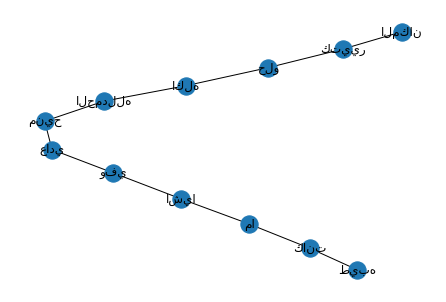

In [ ]:
# Create an empty graph
G = nx.Graph()

# Define the sentence
sentence = 'المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه'

words = sentence.split()
# Add nodes to the graph
for word in words:
    G.add_node(word)

# Add edges between words
for i in range(len(words) - 1):
    G.add_edge(words[i], words[i+1])

# Draw the graph
nx.draw(G, with_labels=True)

In [ ]:
!pip install arabic_reshaper


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


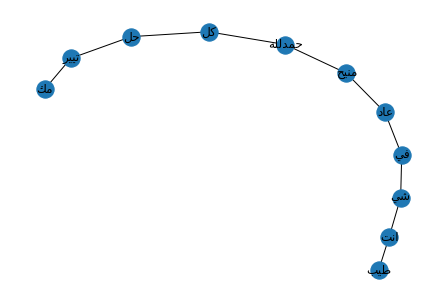

In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import networkx as nx

G = nx.Graph()

# Arabic text preprocessing 
reshaped_text = arabic_reshaper.reshape(u'مك تيير حل كل حمدلله منيح عاد في شي انت طيب')
artext = get_display(reshaped_text)
words = artext.split()

# Add nodes to the graph
for word in words:
    G.add_node(word)

# Add edges between words
for i in range(len(words) - 1):
    G.add_edge(words[i], words[i+1])

# Draw the graph
nx.draw(G, with_labels=True)

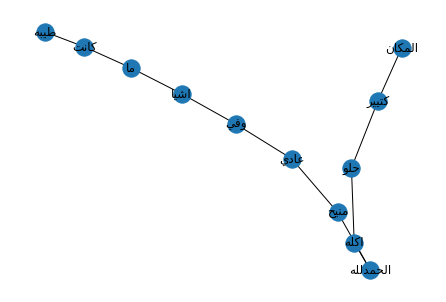

In [ ]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
import networkx as nx

G = nx.Graph()

# Arabic text preprocessing 
reshaped_text = arabic_reshaper.reshape(u'المكان كتيير حلو اكله الحمدلله منيح عادي وفي اشيا ما كانت طيبه')
artext = get_display(reshaped_text)
words = artext.split()

# Add nodes to the graph
for word in words:
    G.add_node(word)

# Add edges between words
for i in range(len(words) - 1):
    G.add_edge(words[i], words[i+1])

# Draw the graph
nx.draw(G, with_labels=True)

